<h1 style="color:#034e7d; font-size:50px; font-family:MV Boli; text-align:center;">Tasks Notebook</h1>

In [1]:
# Imports

# Data frames
import pandas as pd

# Statistics.
import scipy.stats as ss

# Machine Learning.
import sklearn as sk

# https://www.datacamp.com/tutorial/random-forests-classifier-python
from sklearn.ensemble import RandomForestClassifier

# numpy
import numpy as np

# Decomposition.
import sklearn.decomposition as dec

# Plots.
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

# Preprocessing.
import sklearn.preprocessing as pre

<h1 style="color:#595959; font-size:46px; font-family:MV Boli; text-align:center;">Task 1</h1>

Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as math. In this task, you should write a function `sqrt(x)` to approximate the square root of a floating point number x without using the power operator or a package.
Rather, you should use the Newton’s method. Start with an initial guess for the square root called $z_{0}$. You then repeatedly improve it using the following formula, until the difference between some previous guess $z_{i}$ and the next $z_{i+1}$ is less than some threshold, say $0.01$.

$$ z_{i+1} = z_i - \frac{z_i \times z_i - x}{2z_i} $$

## Sqrt

Calculating the square root to within 0.01 of the exact square root.

In [2]:
def sqrt(x):
    # Starting out with an inital guess of half the value as the square
    # root must be smaller than the value
    z1 = 0.5*x

    # Refine the guess and compare the 2 values repeatedly until they
    # are within 0.01 of each other.
    z2 = z1 - (((z1 * z1) - x) / (2 * z1))
    while z2 < z1-0.01 or z2 > z1+0.01:
        z1 = z2
        z2 = z1 - (((z1 * z1) - x) / (2 * z1))
    
    return z1

sqrt(26)

5.099037252729456

This function (sqrt2) calculates the square root to  the exact square root.

In [3]:
def sqrt2(x):
    z1 = 0.5*x # Initial guess
    z2 = z1 - (((z1 * z1) - x) / (2 * z1))
    while z2 != z1:
        z1 = z2
        z2 = z1 - (((z1 * z1) - x) / (2 * z1))
    
    return z1

sqrt2(26)

5.0990195135927845

Verifying the answer with the actual square root

In [4]:
26**0.5

5.0990195135927845

## End Task 1
***

<h1 style="color:#595959; font-size:46px; font-family:MV Boli; text-align:center;">Task 2</h1>

Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.

Drink v Biscuits

|  | Chocolate | Plain |
| --- | --- | --- |
| Tea | 43 | 57 |
| Coffee | 56 | 45 |

# Chi-Square Tests

***

In [5]:
# Data frames.
import pandas as pd

# Shuffles.
import random

# Statistics.
import scipy.stats as ss

In [6]:
# 43 people who prefer Coffee and Chocolate biscuits
coffee_choc = [['Coffee', 'Chocolate']] * 43
#coffee_choc = [['Coffee', 'Chocolate']] * 10 # Trying it with different values

# Show.
coffee_choc

[['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 

In [7]:
# 43 people who prefer Coffee and Chocolate biscuits
tea_choc = [['Tea', 'Chocolate']] * 56
#tea_choc = [['Tea', 'Chocolate']] * 85  # Trying it with different values

# Show.
tea_choc

[['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'C

In [8]:
# 43 people who prefer Coffee and Chocolate biscuits
coffee_plain = [['Coffee', 'Plain']] * 57
#coffee_plain = [['Coffee', 'Plain']] * 90  # Trying it with different values

# Show.
coffee_plain

[['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee'

In [9]:
# 43 people who prefer Coffee and Chocolate biscuits
tea_plain = [['Tea', 'Plain']] * 45
#tea_plain = [['Tea', 'Plain']] * 15  # Trying it with different values

# Show.
tea_plain

[['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain']]

In [10]:
# Raw data, merge the four lists.
raw_data = coffee_choc + tea_choc + coffee_plain + tea_plain

# Show.
raw_data

[['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 

In [11]:
# Shuffle the data.
random.shuffle(raw_data)

# Show.
raw_data

[['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Pla

In [12]:
# Zip the list - make the rows columns and the columns rows.
# Interchanges the outer and inner lists.
drink, biscuit = list(zip(*raw_data))

# Show.
drink, biscuit

(('Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee'

In [13]:
# Create a data frame.
df = pd.DataFrame({'Drink': drink, 'Biscuit': biscuit})

# Show.
df

,Drink,Biscuit
0,Tea,Chocolate
1,Coffee,Plain
2,Coffee,Chocolate
3,Tea,Plain
4,Coffee,Chocolate
...,...,...
196,Tea,Chocolate
197,Tea,Chocolate
198,Coffee,Plain
199,Coffee,Plain


## Contingency Table

***

In [14]:
# It does not give us what we want, just the different observations and their count
res = ss.contingency.crosstab(df)
res

CrosstabResult(elements=(array(['Chocolate', 'Coffee', 'Plain', 'Tea'], dtype=object),), count=array([ 99, 100, 102, 101]))

In [15]:
# Perform Crosstabs Contingency.
# Returns a table of counts for each possible unique combination in *args
# areguments of sequences must be the same length
cross = ss.contingency.crosstab(df['Drink'], df['Biscuit'])

# Show.
# 43 prefer coffee and choc biscuits, 57 prefer coffee and plain biscuits
# 56 prefer tes and choc biscuits, 45 prefer tea and plain biscuits
cross

CrosstabResult(elements=(array(['Coffee', 'Tea'], dtype=object), array(['Chocolate', 'Plain'], dtype=object)), count=array([[43, 57],
       [56, 45]]))

In [16]:
# The first variable values, and the second.
first, second = cross.elements

# Show.
first, second

(array(['Coffee', 'Tea'], dtype=object),
 array(['Chocolate', 'Plain'], dtype=object))

In [17]:
cross.count

array([[43, 57],
       [56, 45]])

In [18]:
# Do the statistics. Just do them
# Second row in Laerd Statistics (Continuity Correction)
result = ss.chi2_contingency(cross.count, correction=False)

# Show.
result

Chi2ContingencyResult(statistic=3.113937364324669, pvalue=0.07762509678333357, dof=1, expected_freq=array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]]))

In [19]:
# The expected Frequencies if independant
result.expected_freq

array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]])

In [20]:
# Coffee drinkers that prefer Chocolate biscuts
43/57

0.7543859649122807

In [21]:
# both drinkers that prefer Chocolate biscuts
99/201

0.4925373134328358

In [22]:
100*(99/201)

49.25373134328358

## Conclusions

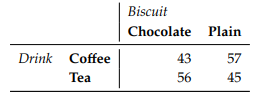

"A p-value is the probability of obtaining data as extreme or more extreme than a set of collected data...A p-value of less than or equal to 0.05 is regarded as evidence of a statistically significant result, and in these cases, the null hypothesis should be rejected in favor of the alternative hypothesis." (Davis, n.d.)

The null hypothesis is that A preference for type of biscuit has no relationship with the type of preferred drink.
Based on the p-value, which states there is approximately 7.78% probability that the drink and biscuit preference have a relationship.
At a confidence level of 0.05 there is not enough evidence to reject the null hypothesis that drink and biscuit have no relationship. What this tells us is that we cannot state to a 95% confidence that there is no relationship between biscuit and drink type. At a 90% confidence (p-value less than 0.1) We could reject the null hypothesis and assume there is no relationship between the biscuit and drink type.
Esentially what is being said is that there is a small chance (7.78%) that the preference for drink is related to the preference for biscuits.

## End Task 2
***

<h1 style="color:#595959; font-size:46px; font-family:MV Boli; text-align:center;">Task 3</h1>

Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.


for seaborn examples. Aug. 30, 2023. url:
https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

In [23]:
# Load Penguin dataset.
df = pd.read_csv('data/penguins.csv')

# Show.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [24]:
# Male body mass.
sample_a = df[df['sex'] == 'MALE']['body_mass_g'].to_numpy()

sample_a

array([3750., 3650., 4675., 3800., 4400., 4500., 4200., 3600., 3950.,
       3800., 3550., 3950., 3900., 3900., 4150., 3950., 4650., 3900.,
       4400., 4600., 3425., 4150., 4300., 4050., 3700., 3800., 3750.,
       4400., 4050., 3950., 4100., 4450., 3900., 4150., 4250., 3900.,
       4000., 4700., 4200., 3550., 3800., 3950., 4300., 4450., 4300.,
       4350., 4100., 4725., 4250., 3550., 3900., 4775., 4600., 4275.,
       4075., 3775., 3325., 3500., 3875., 4000., 4300., 4000., 3500.,
       4475., 3900., 3975., 4250., 3475., 3725., 3650., 4250., 3750.,
       4000., 3900., 3650., 3725., 3750., 3700., 3775., 4050., 4050.,
       3300., 4400., 3400., 3800., 4150., 3800., 4550., 4300., 4100.,
       3600., 4800., 4500., 3950., 3550., 4450., 4300., 3250., 3950.,
       4050., 3450., 4050., 3800., 3950., 4000., 3775., 4100., 5700.,
       5700., 5400., 5200., 5150., 5550., 5850., 5850., 6300., 5350.,
       5700., 5050., 5100., 5650., 5550., 5250., 6050., 5400., 5250.,
       5350., 5700.,

In [25]:
# Female body mass.
sample_b = df[df['sex'] == 'FEMALE']['body_mass_g'].to_numpy()

sample_b

array([3800., 3250., 3450., 3625., 3200., 3700., 3450., 3325., 3400.,
       3800., 3800., 3200., 3150., 3250., 3300., 3325., 3550., 3300.,
       3150., 3100., 3000., 3450., 3500., 3450., 2900., 3550., 2850.,
       3150., 3600., 2850., 3350., 3050., 3600., 3550., 3700., 3700.,
       3550., 3200., 3800., 3350., 3500., 3600., 3550., 3400., 3300.,
       3700., 2900., 3725., 3075., 2925., 3750., 3175., 3825., 3200.,
       3900., 2900., 3350., 3150., 3450., 3050., 3275., 3050., 3325.,
       3500., 3425., 3175., 3400., 3400., 3050., 3000., 3475., 3450.,
       3700., 3500., 3525., 3950., 3250., 4150., 3800., 3700., 3575.,
       3700., 3450., 3600., 2900., 3300., 3400., 3700., 3200., 3350.,
       3900., 3850., 2700., 3650., 3500., 3675., 3400., 3675., 3325.,
       3600., 3350., 3250., 3525., 3650., 3650., 3400., 3775., 4500.,
       4450., 4550., 4800., 4400., 4650., 4650., 4200., 4150., 4800.,
       5000., 4400., 5000., 4600., 4700., 5050., 5150., 4950., 4350.,
       3950., 4300.,

In [26]:
ss.ttest_ind(sample_a, sample_b)

Ttest_indResult(statistic=8.541720337994516, pvalue=4.897246751596224e-16)

In [27]:
mu1 = sample_a.mean()
mu2 = sample_b.mean()
mu1, mu2

(4545.684523809524, 3862.2727272727275)

## Conclusions
"A t-test is an inferential statistic used to determine if there is a statistically significant difference between the means of two variables. The t-test is a test used for hypothesis testing in statistics." (Hayes, 2023)

"A t test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another." (Bevans 2020)


The null hypothesis is that the average body mass for Male and Female Penguins is the same.

n independant t-test was carried out as the data came from 2 different populations (Bevans, 2020). The first population is Male Penguins, the second is female penguins.

The p-value is approximatley 4.9e-16 which is a very small number. With a value of this size we can state that the null hypothesis can be rejected with a 95% confidence level as it is less than 0.05. In fact, we can state that the null hypothesis can be rejected with a 99% confidence level as it is less than 0.01.

## End Task 3
***

<h1 style="color:#595959; font-size:46px; font-family:MV Boli; text-align:center;">Task 4</h1>

Using the famous iris data set, suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.

Iris – UCI Machine Learning Repository.
Aug. 17, 2023. url: https://archive.ics.uci.edu/dataset/53/iris

In [28]:
# Load iris data set.
df_iris = pd.read_csv('data/iris.csv')

# Show.
df_iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [29]:
# Drop rows with NaNs (there are none, but good practice to do it).
df_iris = df_iris.dropna()

# Show.
df_iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
# The X values.
X = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Show.
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
# y values.
y = df_iris['class']

# Show.
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object

In [32]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

# Fit the data.
clf.fit(X, y)

KNeighborsClassifier()

In [33]:
# Quick check that the classifier correctly predicts first X sample.
clf.predict(X.iloc[:1])

array(['setosa'], dtype=object)

In [34]:
# The actual output for the first sample.
y.iloc[0]

'setosa'

In [35]:
# Point a.
a = X.iloc[0]

# Show a.
a

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

In [36]:
# Point b.
b = X.iloc[1]

# Show a.
b

sepal_length    4.9
sepal_width     3.0
petal_length    1.4
petal_width     0.2
Name: 1, dtype: float64

In [37]:
# Distance (Euclidean distance - Pythagoras theorem).
((b - a)**2).sum()**0.5

0.5385164807134502

In [38]:
# Ask the classifier to predict the outputs for the training set inputs.
# (Usually a bad idea.)
clf.predict(X)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
     

In [39]:
# Compare to the expected outputs.
clf.predict(X) == y

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: class, Length: 150, dtype: bool

In [40]:
# Count of incorrect values (true becomes 1 and false become 0)
X.shape[0] - (clf.predict(X) == y).sum()

5

In [41]:
# Proportion of correct predictions.
(clf.predict(X) == y).sum() / X.shape[0]

0.9666666666666667

In [42]:
# Keep some samples back for testing, train on the others.
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y)

In [43]:
# Training inputs (randomly selected).
X_train

,sepal_length,sepal_width,petal_length,petal_width
136,6.3,3.4,5.6,2.4
126,6.2,2.8,4.8,1.8
14,5.8,4.0,1.2,0.2
137,6.4,3.1,5.5,1.8
120,6.9,3.2,5.7,2.3
...,...,...,...,...
38,4.4,3.0,1.3,0.2
142,5.8,2.7,5.1,1.9
16,5.4,3.9,1.3,0.4
104,6.5,3.0,5.8,2.2


In [44]:
# Training outputs (randomly selected).
y_train

136     virginica
126     virginica
14         setosa
137     virginica
120     virginica
          ...    
38         setosa
142     virginica
16         setosa
104     virginica
74     versicolor
Name: class, Length: 112, dtype: object

In [45]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

# Fit the data.
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
# Predict based on test set.
clf.predict(X_test)

array(['versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'setosa', 'virginica'], dtype=object)

In [47]:
(clf.predict(X_test) == y_test).sum() / X_test.shape[0]

0.9473684210526315

In [48]:
# Get the setosa data from the data set (first 50 rows)
df_setosa = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].head(50)

df_setosa

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [49]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

# Fit the data.
clf.fit(X_train, y_train)

# Predict based on setosa test set.
predictArray = clf.predict(df_setosa)
predictArray

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa'], dtype=object)

In [50]:
# Cross Validation
unique_values, counts = np.unique(predictArray, return_counts=True)
# occurences = predictArray.count("setosa")
counts

array([50], dtype=int64)

## Conclusions
K-nearest Neighbor is a "machine learning technique used for classification and regression tasks. It relies on the idea that similar data points tend to have similar labels or values" (Srivastava, 2023). IBM (n.d.) states that "the goal of the k-nearest neighbor algorithm is to identify the nearest neighbors of a given query point, so that we can assign a class label to that point."

Here we use the well know Iris dataset to 'suggest whether the setosa class is easily separable from the other two classes'. When using the K-Nearest Neighbor algorithm to classify each record in the dataset it gave a very accurate result. Using 112 rows of the data to train the classifier, it then in correctly classified the remaining rows over 96% of the time. When the classifier was trained on the same 112 records and then used to classify all 50 of the Setosa records it classified the data correctly 100% of the time even when run multiple times. If one is familiar with the Iris dataset one knows that the Setosa is significantly different to the Virginica and Versicolor Iris flowers which are somewhat similar in characteristics.
Based on the research carried uot here, the Setosa class of Iris can be said to be easily separable from the Virginica and Versicolor classes when using the K-Nearest-Neighbor classifier. TIBC (2021) supports this finding stating that "One of the classes (Iris Setosa) is linearly separable from the other two. However, the other two classes are not linearly separable"

## End Task 4
***

<h1 style="color:#595959; font-size:46px; font-family:MV Boli; text-align:center;">Task 5</h1>

Perform Principal Component Analysis on the iris data set reducing the number of dimensions to two. Explain the purpose of the analysis and your results

Iris – UCI Machine Learning Repository.
Aug. 17, 2023. url: https://archive.ics.uci.edu/dataset/53/iris

In [51]:
# Load iris data set.
df_iris = pd.read_csv('data/iris.csv')

# Show.
df_iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [52]:
# Independent variables.
X = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Show.
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
# Create a new PCA instance.
pca = dec.PCA(n_components=2)

In [54]:
pca.fit(X)

PCA(n_components=2)

In [55]:
# Show the variablity.
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [56]:
# Transform X.
X_pca = pca.transform(X)

# Show.
X_pca

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

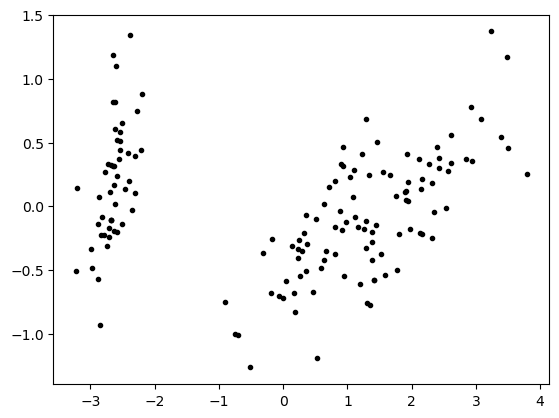

In [57]:
# Create an empty plot.
fig, ax = plt.subplots()

# Plot scatter plot.
ax.plot(X_pca[:, 0], X_pca[:, 1], 'k.');

In [58]:
# Original classifications.
df_pca = pd.DataFrame(df_iris[['class']])

# Show.
df_pca

,class
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [59]:
# Incorporate our PCA variables.
df_pca['pca0'] = X_pca[:, 0]
df_pca['pca1'] = X_pca[:, 1]

# Show.
pca

PCA(n_components=2)

c:\Users\elaine.tynan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


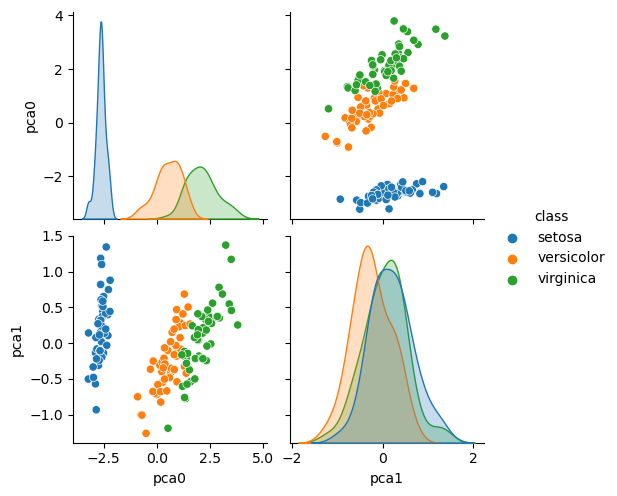

In [60]:
# Pair plot.
sns.pairplot(df_pca, hue='class')

In [61]:
# Create a standard scaler.
scaler = pre.StandardScaler()

# Show.
scaler

StandardScaler()

In [62]:
# Fit the data to the scaler.
scaler.fit(X)

StandardScaler()

In [63]:
# Transformed X array.
X_transformed = scaler.transform(X)

# Show.
X_transformed

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [64]:
# Re-create data frame.
df_X_trans = pd.DataFrame(X_transformed, columns=X.columns)

# Show.
df_X_trans

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [65]:
# Create a new PCA instance.
pca = dec.PCA(n_components=2)

# Fit the scaled data.
pca.fit(df_X_trans)

# Transform.
X_trans_pca = pca.transform(df_X_trans)

# Original classifications.
df_trans_pca = pd.DataFrame(df_iris[['class']])

# Incorporate our PCA variables.
df_trans_pca['pca0'] = X_trans_pca[:, 0]
df_trans_pca['pca1'] = X_trans_pca[:, 1]

# Show.
df_trans_pca

,class,pca0,pca1
0,setosa,-2.264542,0.505704
1,setosa,-2.086426,-0.655405
2,setosa,-2.367950,-0.318477
3,setosa,-2.304197,-0.575368
4,setosa,-2.388777,0.674767
...,...,...,...
145,virginica,1.870522,0.382822
146,virginica,1.558492,-0.905314
147,virginica,1.520845,0.266795
148,virginica,1.376391,1.016362


In [66]:
# Look at the variance.
# 72% are explained by the first variable and 23% by the second variable
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

c:\Users\elaine.tynan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


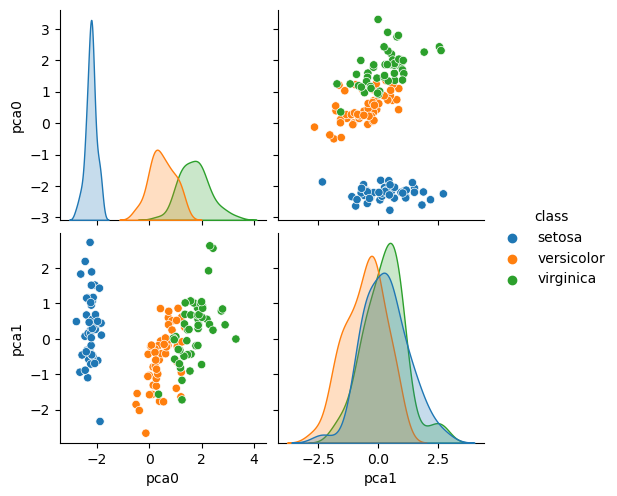

In [67]:
# Pair plot.
sns.pairplot(df_trans_pca, hue='class')

## Conclusions
Explanations

Purpose:

Result:

## End Task 5
***

<h1 style="color:#595959; font-size:46px; font-family:MV Boli; text-align:center;">References</h1>

Bevans, R., (2020) <em>An Introduction to t Tests | Definitions, Formula and Examples</em> Available at: https://www.scribbr.com/statistics/t-test/ (Accessed 26 October 2023)

Davis, A., (n.d.) <em>How to Interpret the p-Value for the Chi-Square Test for Goodness of Fit.</em> Available at: https://study.com/skill/learn/how-to-interpret-the-p-value-for-the-chi-square-test-for-goodness-of-fit-explanation.html (Accessed 25 October 2023)

Hayes, A., (05 April 2023) <em>T-Test: What It Is With Multiple Formulas and When To Use Them: Read how this calculation can be used for hypothesis testing in statistics</em> Available at: https://www.investopedia.com/terms/t/t-test.asp (Accessed 26 October 2023)

IBM, (n.d.) <em>What is the k-nearest neighbors algorithm?</em>Available at: https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point. (Accessed 16 November 2023)

Srivastava, T., (2023) <em>A Complete Guide to K-Nearest Neighbors</em> Available at: https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/ (Accessed 16 November 2023)

TIBC, (2021) <em>Statistica Automated Neural Networks (SANN). SANN Example 2: The Iris Problem (Classification)</em> Available at: https://docs.tibco.com/pub/stat/14.0.0/doc/html/UsersGuide/GUID-BAFF757E-4B58-4DB8-9904-A2F1598869E3.html#:~:text=The%20Iris%20data%20set%20has,achieve%20a%20perfect%20classification%20rate. (Accessed 16 November 2023)